### 1. Reading and understandind section

In [13]:
# Import Section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as datetime
import pycountry_convert as pcc
from datetime import timedelta
from plotly.subplots import make_subplots

In [14]:
# Reading section
df = pd.read_csv(r'C:\Users\Admin\Desktop\Japan_Project\visa_number_in_japan.csv')

In [15]:
# Count of the countries on full dataset
print('Amount of Countries in data:', len(df))
df['Country'].unique()

Amount of Countries in data: 1945


array(['total', 'Afghanistan', 'Albania', 'Algeria', 'Andra', 'Angola',
       'Antigua Berbuda', 'Azerbaijan', 'Argentina', 'Australia',
       'Austria', 'Bahamas', 'Barrane', 'Bangladesh', 'Armenia',
       'Barbados', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia Herzegovna',
       'Botwana', 'Brazil', 'Belize', 'Solomon', 'Brunei', 'Bulgaria',
       'Myanmar', 'Brush', 'Belarus', 'Cambodia', 'Cameroon', 'Canada',
       'Carbo verde', 'Central Africa', 'Sri Lanka', 'Chad', 'Chile',
       'China', 'Taiwan', 'Columbia', 'Komoro', 'Congo',
       'Congo Democratic Republic', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Benan', 'Denmark', 'Dominica',
       'dominican republic', 'Ecuador', 'El Salvador',
       'Equatorial guinea', 'Ethiopia', 'Eritria', 'Estonia', 'Georgia',
       'Fiji', 'Finland', 'France', 'Jibuti', 'Gabon', 'Gambia',
       'Palestine', 'Germany', 'Ghana', 'Kiribass', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Gaiana', 'Haiti', 'Hon

It is clear that some countries, such as *Andra* and *Lesot*, are not recognized by the UN. Considering this list is organized alphabetically, the data likely refers to Andorra, which has a population of less than 100,000 people, consistent with the low number of visas issued.

### 2. Cleaning section

In [55]:
# Corrections of countries name such as Andra and Lesot
country_corrections = {
    'Andra': 'Andorra',
    'Antigua Berbuda': 'Antigua and Barbuda',
    'Barrane': 'Bahrain',
    'Brush': 'Bhutan',
    'Komoro': 'Comoros',
    'Benan': 'Benin',
    'Kiribass': 'Kiribati',
    'Gaiana': 'Guyana',
    'Court Jiboire': "Côte d'Ivoire",
    'Lesot': 'Lesotho',
    'Macau travel certificate': 'Macao',
    'Moldoba': 'Moldova',
    'Naure': 'Nauru',
    'Nigail': 'Niger',
    'Palao': 'Palau',
    'St. Christopher Navis': 'Saint Kitts and Nevis',
    'Santa Principa': 'Sao Tome and Principe',
    'Saechel': 'Seychelles',
    'Slinum': 'Saint Helena',
    'Swaji Land': 'Eswatini',
    'Torque menistan': 'Turkmenistan',
    'Tsubaru': 'Zimbabwe',
    'Kosovo': 'Kosovo',
    'Congo Democratic Republic': 'Congo',
    'Hong Kong DI': 'Hong Kong',
    'Hong Kong SAR': 'Hong Kong',
    'Hong Kong (UK)': 'Hong Kong',
    "UK's directly under the UK": 'UK',
    'Yugoslavia': 'Serbia',
    'Yugoslavia Socialist Federal Republic' : 'Serbia'
}

df['Country'] = df['Country'].map(country_corrections).fillna(df['Country'])

In [33]:
# Delete all rows with column 'total' and 'others' in the Country column
df = df[(df['Country'] != 'others') & (df['Country'] != 'total')]

To analyze the continents, we'll develop a function called get_continent_name and implement a filter to specifically target the years *2010 to 2017*. This focused approach will allow for a more detailed and comprehensive analysis of the data.

In [32]:
# Function to correct countries name such as 
def get_continent_name(country_name):
    try:
        country_code = pcc.country_name_to_country_alpha2(country_name, cn_name_format='default')
        continent_code = pcc.country_alpha2_to_continent_code(country_code)
        return pcc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None
df['Continent'] = df['Country'].apply(get_continent_name)

In [18]:
# Desired years in range of 2010 to 2017
desired_years = list(range(2010, 2017))
df = df[df['Year'].isin(desired_years)]

In [20]:
# Null values anaysis
df.isnull().sum()

Year                                             0
Regional code                                    0
Country                                          0
Number of issued                                 0
Number of issued_numerical                       0
Travel certificate                               0
Diplomacy                                        0
Public use                                       0
Passing                                          0
Short -term stay                                 0
Staying in medical care                        205
Advanced profession                            411
Employment                                       0
Employment_Professor                             0
Employment_Art                                   0
Employment_religion                              0
Employment_Report                                0
Employment_Management / Management               0
Employment_Law accounting                        0
Employment_Medical care        

In [21]:
# Dropping null rolls
df = df.dropna(how='all')
df

,Year,Regional code,Country,Number of issued,Number of issued_numerical,Travel certificate,Diplomacy,Public use,Passing,Short -term stay,...,Specific_housework employee,Specified_short term,Specific_profit representative staff,Specific_working holiday,Specified_Amasport,"Specific_Japanese spouse, etc.","Specific_Permanent resident's spouse, etc.",Specified_Distingant,Specific_Others,Continent
203,2016,40,Afghanistan,1009,60,0.0,13.0,122.0,0,233,...,0.0,NaN,0.0,0.0,0.0,0,4.0,7,11.0,Asia
204,2016,80,Albania,179,10,0.0,0.0,4.0,2,135,...,0.0,NaN,0.0,0.0,0.0,2,0.0,0,0.0,Europe
205,2016,120,Algeria,774,42,0.0,7.0,10.0,4,695,...,0.0,NaN,0.0,0.0,1.0,1,0.0,0,0.0,Africa
206,2016,200,Andorra,5,0,0.0,0.0,0.0,0,0,...,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0,Europe
207,2016,240,Angola,278,56,0.0,24.0,46.0,0,166,...,0.0,NaN,0.0,0.0,0.0,1,0.0,0,0.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2010,8620,Venezuela,1661,121,0.0,15.0,24.0,24,1455,...,0.0,NaN,0.0,0.0,0.0,8,0.0,0,0.0,South America
1640,2010,8820,Samoa Independent State,129,11,0.0,4.0,11.0,1,69,...,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0,None
1641,2010,8870,Yemen,332,22,0.0,17.0,4.0,0,235,...,0.0,NaN,0.0,0.0,0.0,0,0.0,0,0.0,Asia
1642,2010,8940,Zambia,406,20,0.0,18.0,6.0,3,241,...,0.0,NaN,0.0,0.0,0.0,2,0.0,0,1.0,Africa


### 3. EDA

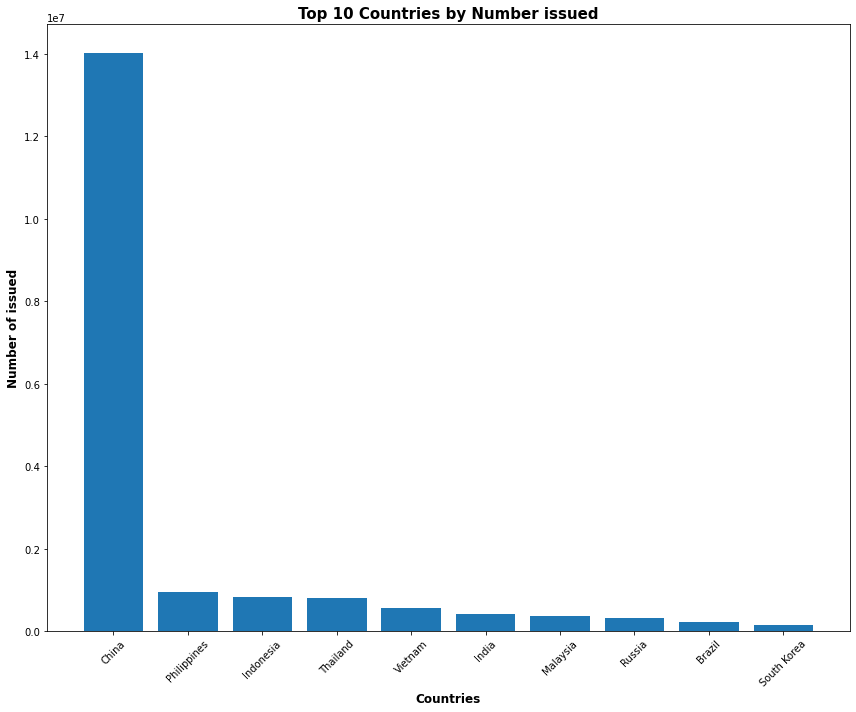

In [54]:
# Grouping the data by country and adding up the number of visas issued
df_grouped = df.groupby('Country')['Number of issued'].sum().reset_index()

# Data sorted by numer of issued
df_grouped_sorted = df_grouped.sort_values(by='Number of issued', ascending=False).head(10)

# plt configurations
plt.figure(figsize=(12, 10))
bar = plt.bar(df_grouped_sorted['Country'], df_grouped_sorted['Number of issued'])
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number of issued', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Number issued', fontsize=15, fontweight='bold')
plt.xticks(rotation=45) 
plt.tight_layout()  


plt.show()

Between 2010 and 2017, a noticeable trend emerged among the top 10 countries: a predominant presence of Asian nations, with China, the Philippines, and Indonesia securing the top three spots. China leads by a significant margin with 14 million views, followed by 950 million from the Philippines and 840 million from Indonesia. Additionally, it is noteworthy that many of these top-ranking countries are geographically proximate to Japan. This proximity suggests several factors potentially influencing this trend, such as logistical convenience and accessibility, possibly driven by factors like more affordable airfare options.

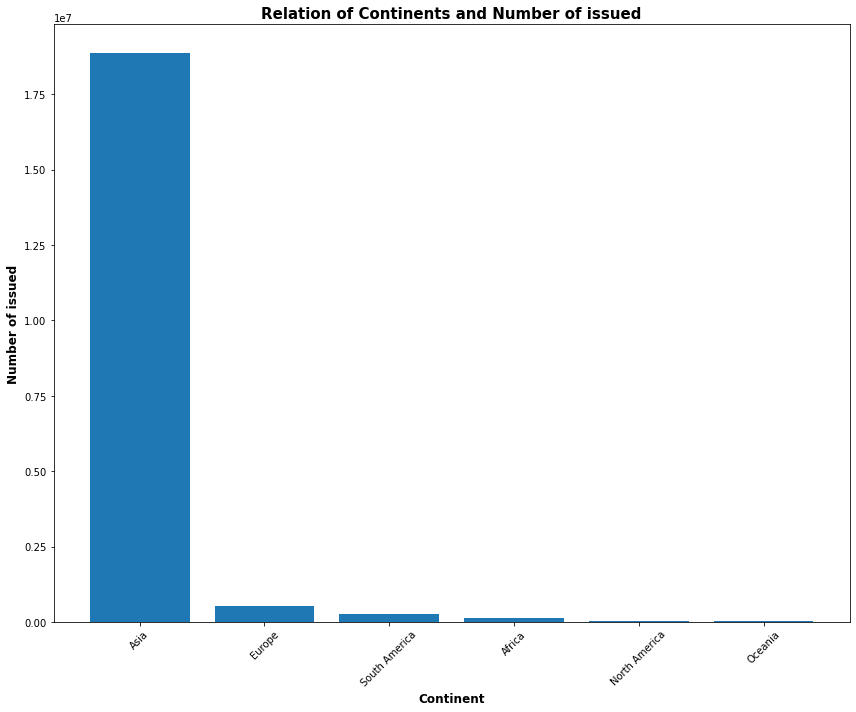

In [37]:
# Grouping the data by continet and adding up the number of visas issued
df_grouped = df.groupby('Continent')['Number of issued'].sum().reset_index()

# Data sorted by numer of issued
df_grouped_sorted = df_grouped.sort_values(by='Number of issued', ascending=False).head(7)

# plt configurations
plt.figure(figsize=(12, 10))
bar = plt.bar(df_grouped_sorted['Continent'], df_grouped_sorted['Number of issued'])
plt.xlabel('Continent', fontsize=12, fontweight='bold')
plt.ylabel('Number of issued', fontsize=12, fontweight='bold')
plt.title('Relation of Continents and Number of issued', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)  
plt.tight_layout() 


plt.show()

Looking at the numbers across continents, it's clear that Asia takes the lead with impressive 18 million issuances, while Europe follows behind with around 512 thousand. South America comes in next with 278 thousand, and Africa isn't far off with about 145 thousand. Bringing up the rear, we've got North America with around 40 thousand and Oceania with roughly 39 thousand. 

For a deeper dive into this dataset, we'll conduct a detailed analysis on the following points in the upcoming cells:
### Recruiting Professors from Japan
### Examination of Issued Student Visas
### Marriages of Japanese Citizens Outside Japan"

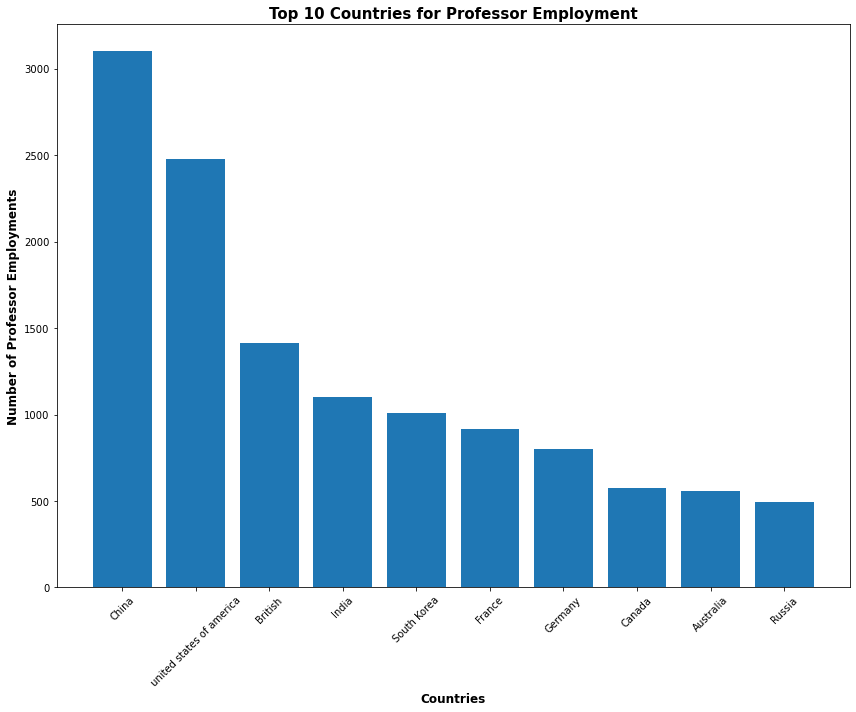

In [43]:
# Grouping the data by country and adding up the employment professor
df_grouped = df.groupby('Country')['Employment_Professor'].sum().reset_index()

# Data sorted by employment professor
df_grouped_sorted = df_grouped.sort_values(by='Employment_Professor', ascending=False).head(10)

# plt configurations
plt.figure(figsize=(12, 10))
bar = plt.bar(df_grouped_sorted['Country'], df_grouped_sorted['Employment_Professor'])
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number of Professor Employments', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries for Professor Employment', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

In this scenario, a noticeable shift from the prevailing trend toward Asian countries becomes evident, as evidenced by the presence of six non-Asian countries on the list, deviating from established patterns.

Analyzing the data, we find that the top countries in terms of employment of professors encompass a mix of Asian and non-Asian nations. While China leads the list with 3,101 employed professors, the United States of America follows closely with 2,478. Notably, the United States' high ranking challenges the expectation of an exclusively Asian-dominated landscape. Furthermore, countries like the United Kingdom, India, South Korea, France, and Germany also secure significant positions, indicating a diverse global distribution of academic employment opportunities.

This departure from the conventional Asian-centric narrative underscores the evolving dynamics within the academic landscape, suggesting a broader internationalization of academic talent and expertise beyond traditional boundaries.

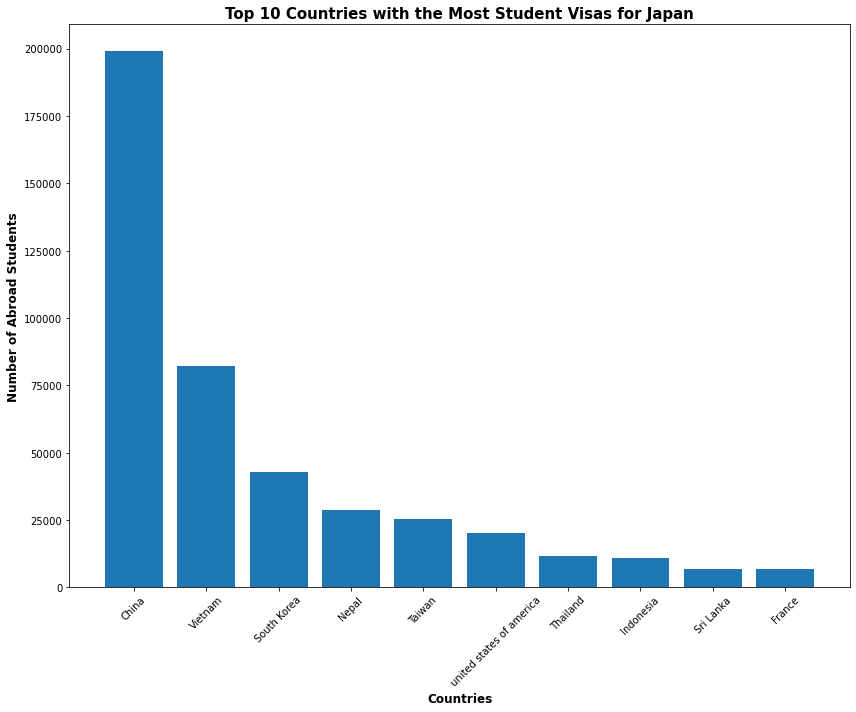

In [48]:
# Grouping the data by country and adding up the Studyind abroad
df_grouped = df.groupby('Country')['General_Studying abroad'].sum().reset_index()

# Data sorted by employment professor
df_grouped_sorted = df_grouped.sort_values(by='General_Studying abroad', ascending=False).head(10)

# plt configurations
plt.figure(figsize=(12, 10))
bar = plt.bar(df_grouped_sorted['Country'], df_grouped_sorted['General_Studying abroad'])
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number of Abroad Students', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries with the Most Student Visas for Japan', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

In a similar matter, while Asian countries dominate the top 10 in both cases, the inclusion of the USA in the student visa domain introduces a unique dimension, attributed to its maritime border with Japan. China emerges as the leader with over 40 million student visas in 2017, highlighting its pivotal role in shaping educational mobility in the region.

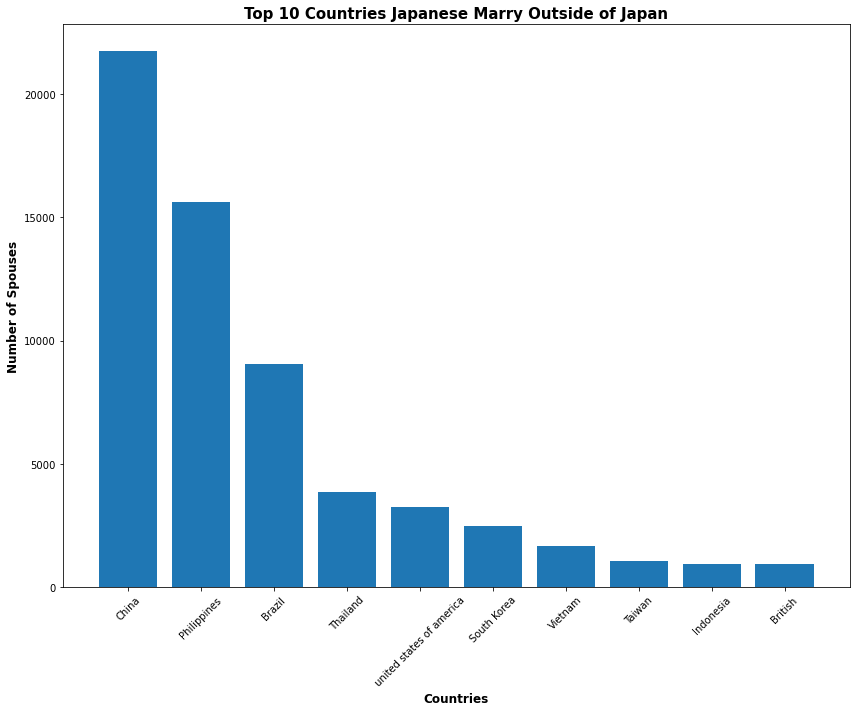

In [53]:
# Grouping the data by country and adding up japanese spouse column
df_grouped = df.groupby('Country')['Specific_Japanese spouse, etc.'].sum().reset_index()

# Data sorted by employment professor
df_grouped_sorted = df_grouped.sort_values(by='Specific_Japanese spouse, etc.', ascending=False).head(10)

# plt configurations
plt.figure(figsize=(12, 10))
bar = plt.bar(df_grouped_sorted['Country'], df_grouped_sorted['Specific_Japanese spouse, etc.'])
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number of Spouses', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries Japanese Marry Outside of Japan', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

In this scenario, China, the Philippines, and Brazil emerge as the top three contenders. Brazil's appearance in the top ranks is particularly noteworthy, as it has not been a frequent presence in the previous analyses of the top 10. This unexpected inclusion adds an element of surprise to the current findings.